### LDA Model

Load Dataset

In [1]:
import pandas as pd

# load the dataset
dataset_path = 'amazon_sales_2023_cleaned.csv'
df = pd.read_csv(dataset_path)

# define the categories to select   Health and Personal Care, Electronics, Home and Kitchen, Toys and Games, Clothing Shoes and Jewelry
selected_categories = ['Clothing Shoes and Jewelry']
df = df[df['category'].isin(selected_categories)]

# define the categories to select   positive neutral negative
selected_sentiment = ['negative']
df = df[df['sentiment'].isin(selected_sentiment)]

Feature Extraction (BoW)

In [2]:
# use bow vectorizer
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
bow_doc_term_matrix = bow_vectorizer.fit_transform(df['reviewText'])

In [3]:
bow_doc_term_matrix.shape

(49969, 10638)

LDA Model

In [4]:
from sklearn.decomposition import LatentDirichletAllocation

# lda model
lda_model = LatentDirichletAllocation()  # n_topics = 10 # n_components=n_topics
lda_model.fit(bow_doc_term_matrix)

LatentDirichletAllocation()

Topic Words Score visualization

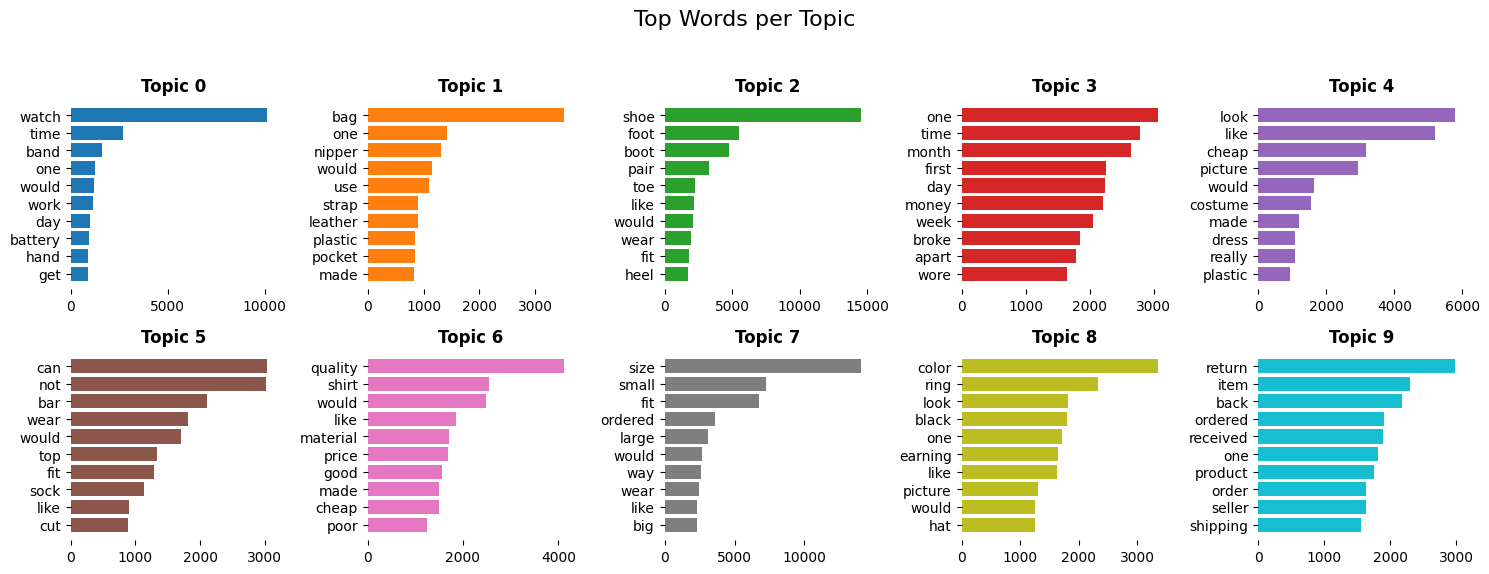

In [5]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = bow_vectorizer.get_feature_names_out() 

# colors for each topic
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharex=False, sharey=False)
axes = axes.flatten()

for i, (topic, color) in enumerate(zip(lda_model.components_, colors)):
    top_words_idx = np.argsort(topic)[::-1][:10]  # descending order
    top_words = feature_names[top_words_idx]
    top_scores = topic[top_words_idx]

    ax = axes[i]
    ax.barh(top_words, top_scores, color=color)
    ax.set_title(f'Topic {i}', fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)
    for spine in ax.spines.values():
        spine.set_visible(False)

fig.suptitle('Top Words per Topic', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Using Gensim to visualize intertopic

In [6]:
# from gensim.corpora.dictionary import Dictionary

# # create dic, corpus and tokenized
# tokenized_docs = [doc.split() for doc in df['reviewText']]
# dictionary = Dictionary(tokenized_docs)
# corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

In [7]:
# from gensim.models.ldamodel import LdaModel
# import pyLDAvis.gensim_models as gensimvis
# import pyLDAvis

# # pyLDAvis
# n_topics = 10
# lda_gensim = LdaModel(corpus=corpus, id2word=dictionary,  num_topics=n_topics)
# vis_data = gensimvis.prepare(lda_gensim, corpus, dictionary)
# pyLDAvis.display(vis_data)